# Lei do Resfriamento de Newton (Exemplo para aula 02/05/22)

Usando como base a **Lei do Resfriamento de Newton**, teremos

\begin{equation}
    \dfrac{d\theta}{dt} = -k_t \dot (\theta - \theta_m)
\end{equation}

Podemos discretizar a equação diferencial em (1) seguindo um conjunto lógico de passos:


   1) Sabemos, pela formulação do **Polinômio de Taylor** que podemos escrever a derivada presente em (1) como
        \begin{equation}
            \theta'(t_j) = \dfrac{\theta_{j} - \theta_{0}}{h}\cdot \tau_j
        \end{equation}

   2) Como queremos uma aproximação, podemos desconsiderar o $\tau_j$ na nossa equação. Assim
        \begin{equation}
            \theta'(t_j) = \dfrac{\theta_{j} - \theta_{0}}{h}
        \end{equation}

   3) Substituímos na nossa euqação inicialmente dada
        \begin{equation}
            \dfrac{\theta_{j} - \theta_{0}}{h} = -k_t (\theta_0 - \theta_m)
        \end{equation}
   4) Agora teremos que isolar o termo que queremos descobrir ($\theta_j$) na equação
        \begin{equation}
            \theta_j - \theta_0 = h\cdot[-k_t(\theta_0 - \theta_m)]
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 + h\cdot[-k_t(\theta_0 - \theta_m)]
        \end{equation}
   5) Colocando $\theta_0$ em evidência
        \begin{equation}
            \theta_j = \theta_0 + h\cdot(-k_t\theta_0 + k_t\theta_m)
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 - h\cdot k_t\theta_0 + h\cdot k_t\theta_m
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 \cdot (1 - h \cdot k_t) + h \cdot k_t \cdot \theta_m
        \end{equation}


Temos agora a **formulação de diferenças finitas** para nossa equação. Podemos aplicar o **Método de Euler Explícito** para resolver essa equação numericamente.

In [3]:
# Importando as bibliotecas
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

In [4]:
# Primeiramente, definimos os dados do PVI e alguns outros dados iniciais
theta_inicial = 80 # temperatura inicial do corpo
theta_meio = 0 # temperatura inicial do meio
k_t = 0.1386 # constante
T = 20 # minuto final (onde parar a discretização)
M = 4 # número de pontos na discretização

h = T/M # calculando o espaço entre os pontos da discretização

In [5]:
# Preparando para o Método de Euler
t = np.zeros(M)
y = np.zeros(len(t) + 1)

for i in range(M):
    t[i] = i

In [6]:
# Executando o Método de Euler Explícito
y[0] = theta_inicial
for i in range(0, len(t)):
    y[i + 1] = y[i] * (1 - k_t*h) + h*k_t*theta_meio


In [7]:
# Exibindo os resultados em uma tabela

print(" Tempo(min) \t\t\t\t\t\t   Temperatura(°C)")
print("--------------------------------------------------------------------------------------------")
for i in range(len(y)):
    print(" %f \t\t\t\t|\t\t\t\t %f" % (i*h, y[i]))

 Tempo(min) 						   Temperatura(°C)
-------------------------------------------------------
 0.000000 				|				 80.000000
 5.000000 				|				 24.560000
 10.000000 				|				 7.539920
 15.000000 				|				 2.314755
 20.000000 				|				 0.710630


In [9]:
# Preparando dados para plotagem

t = np.zeros(len(y))

for i in range(len(y)):
    t[i] = i*h

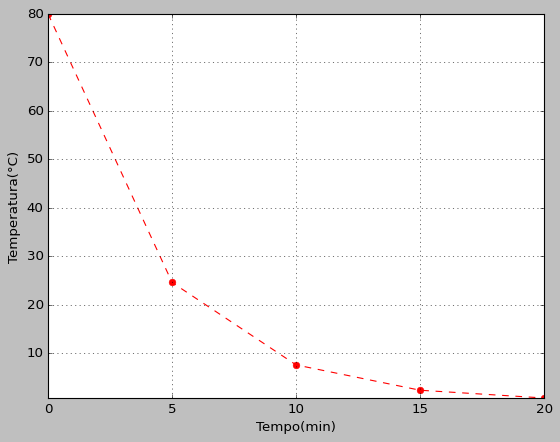

In [10]:
# Plotando o gráfico

with plt.style.context('classic'):
    plt.grid(True)
    plt.xlabel("Tempo(min)")
    plt.ylabel("Temperatura(°C)")
    plt.plot(t,y, 'r--o')
plt.show()